# Загрузка датасета

In [24]:
!kaggle datasets download -d data855/heart-disease

Dataset URL: https://www.kaggle.com/datasets/data855/heart-disease
License(s): CC0-1.0
heart-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
!unzip -o heart-disease.zip

Archive:  heart-disease.zip
  inflating: heart.csv               


# Импортируем нужные модули

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

import gc

sns.set()
%matplotlib inline

import sys

np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 100  #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100)  # None)
plt.style.use('seaborn-v0_8-whitegrid')

# plt.rcParams["figure.figsize"] = (20, 15)

import warnings

warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('./heart.csv')

columns = df.columns

In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
df.info()  # информация по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df.shape  # размерность

(304, 14)

In [31]:
df.dtypes

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target      object
dtype: object

In [32]:
df.describe()  # описательная статистика только для столбцов с числовым значением

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,304,304,304,304,304,304,304,304,304,304,304,304,304,304
unique,42,3,5,50,153,3,4,92,3,41,4,6,5,3
top,58,1,0,120,204,0,1,162,0,0,2,0,2,1
freq,19,207,143,37,6,258,152,11,204,99,142,175,166,165


In [33]:
df.describe(include=['object'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,304,304,304,304,304,304,304,304,304,304,304,304,304,304
unique,42,3,5,50,153,3,4,92,3,41,4,6,5,3
top,58,1,0,120,204,0,1,162,0,0,2,0,2,1
freq,19,207,143,37,6,258,152,11,204,99,142,175,166,165


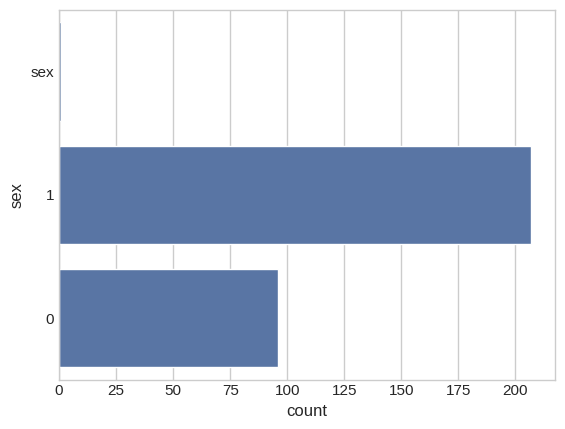

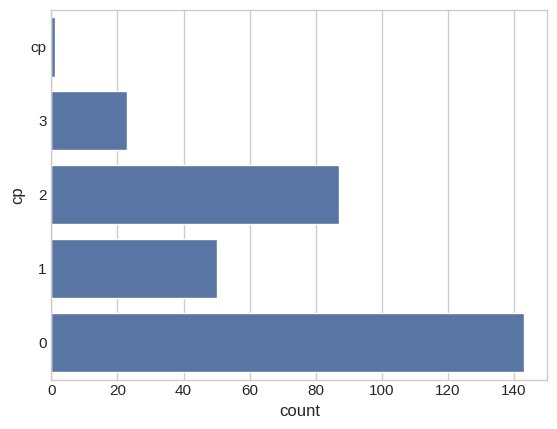

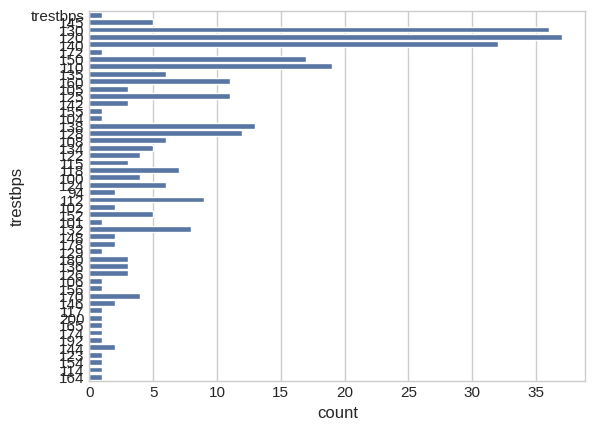

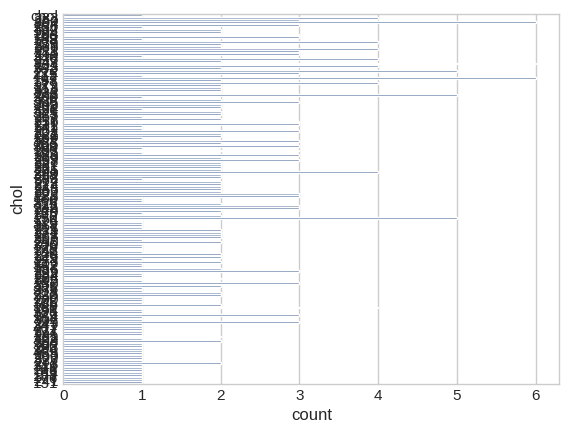

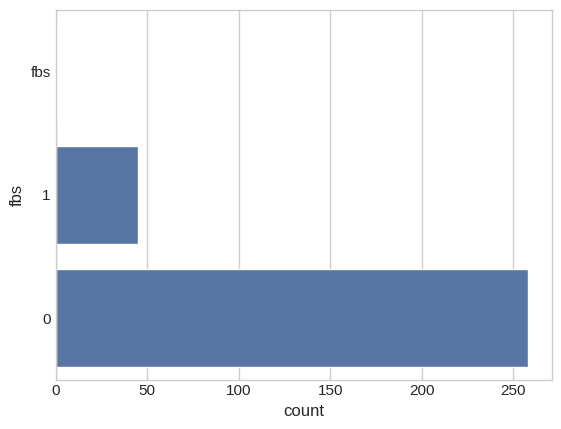

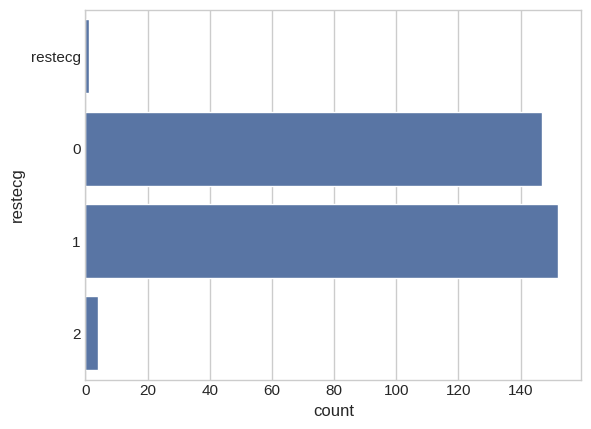

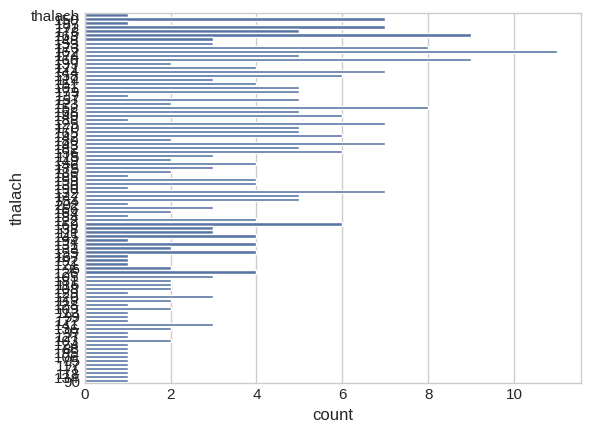

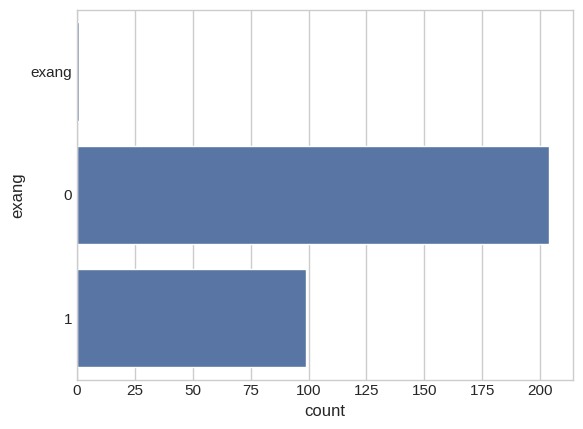

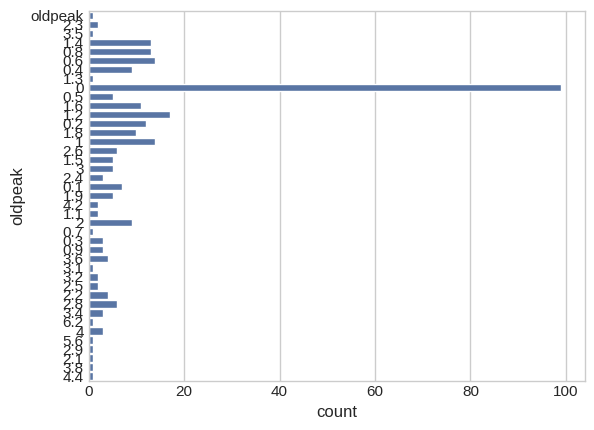

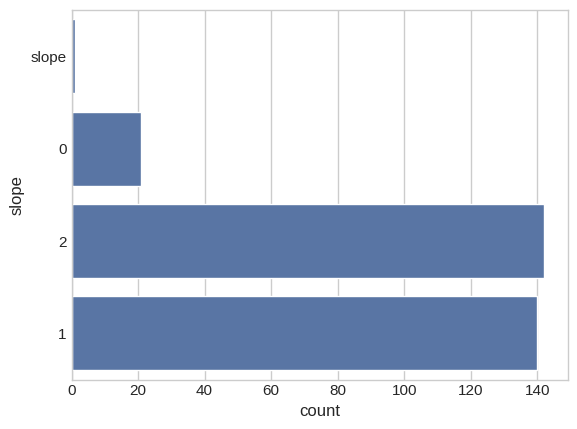

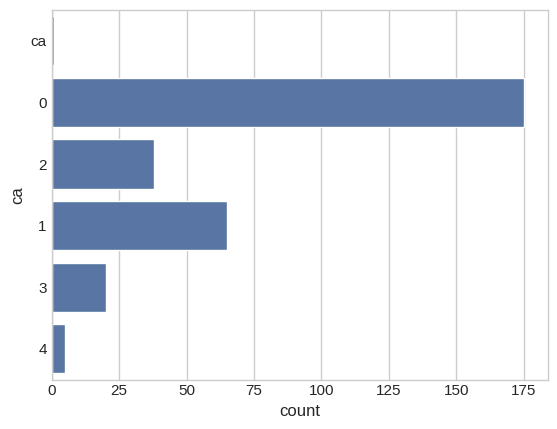

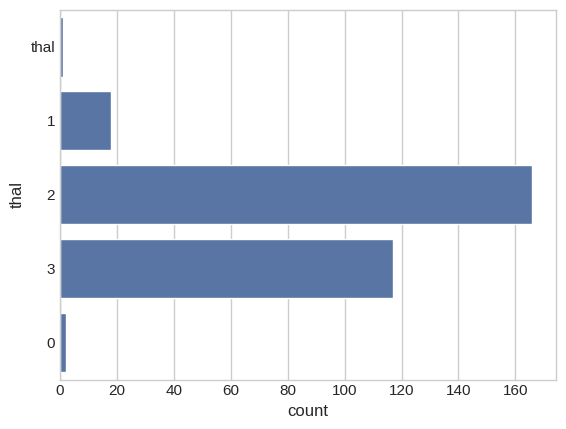

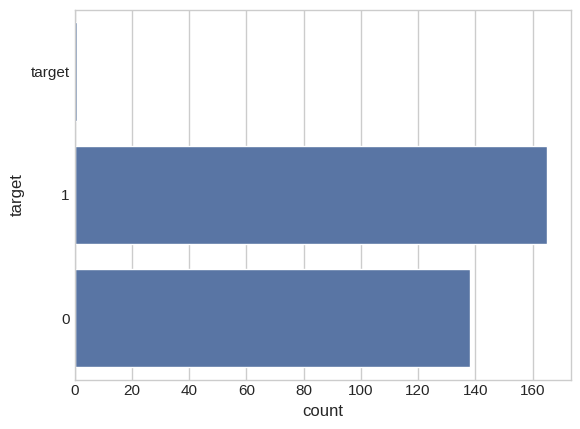

IndexError: index 14 is out of bounds for axis 0 with size 14

In [34]:
for i in range(1, 81):
    sns.countplot(y=df[columns[i]], data=df)
    plt.show()


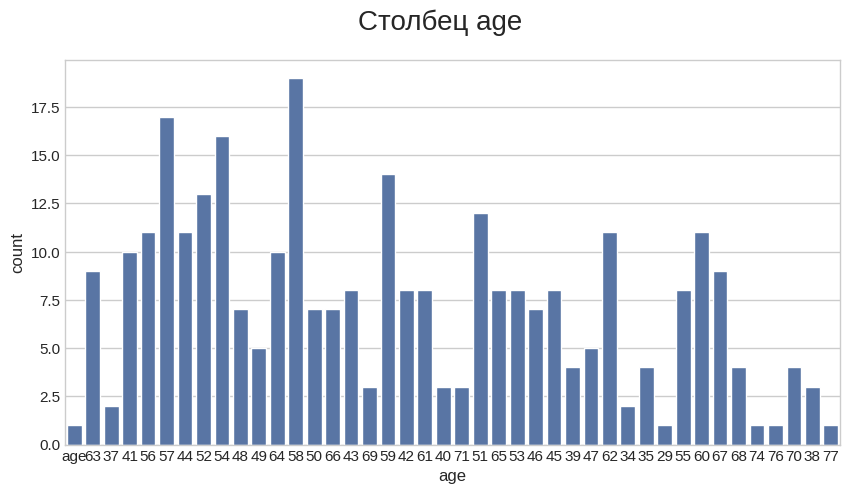

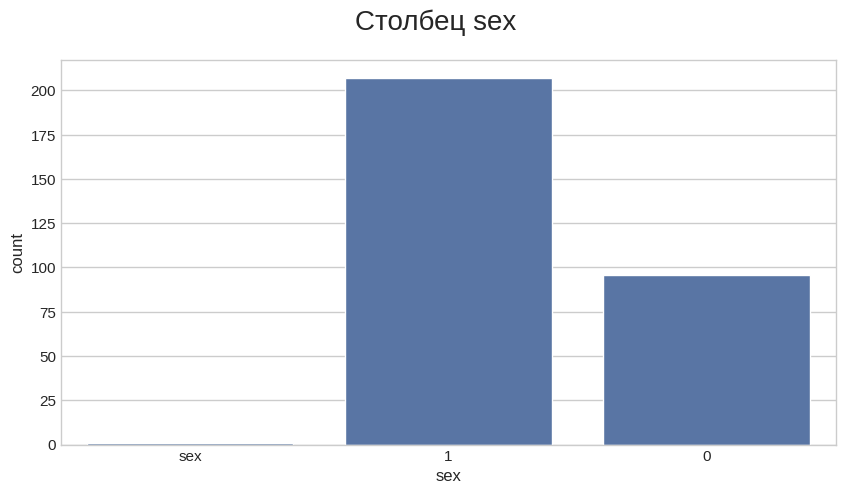

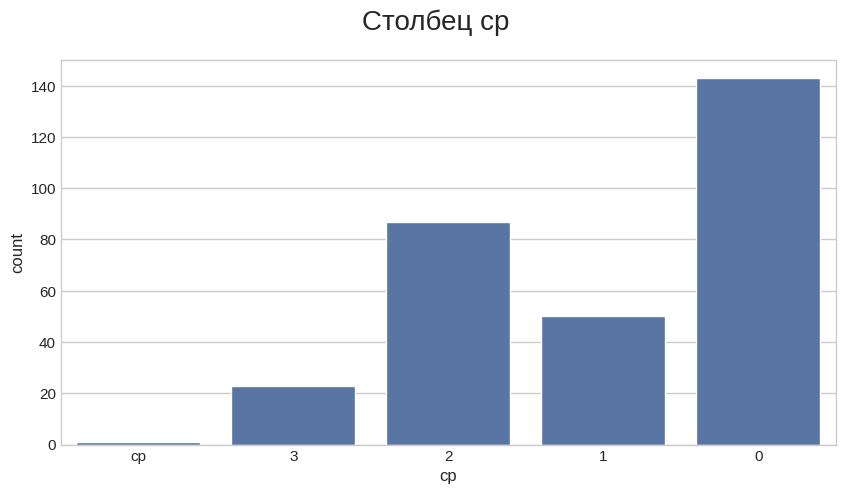

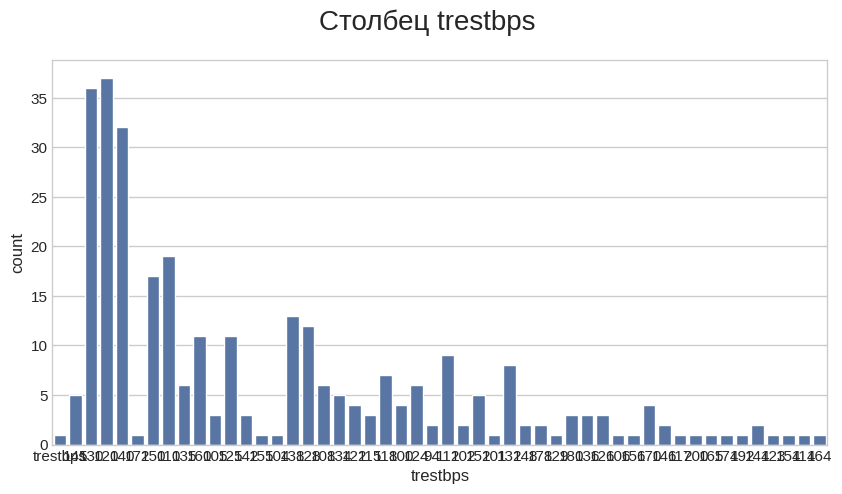

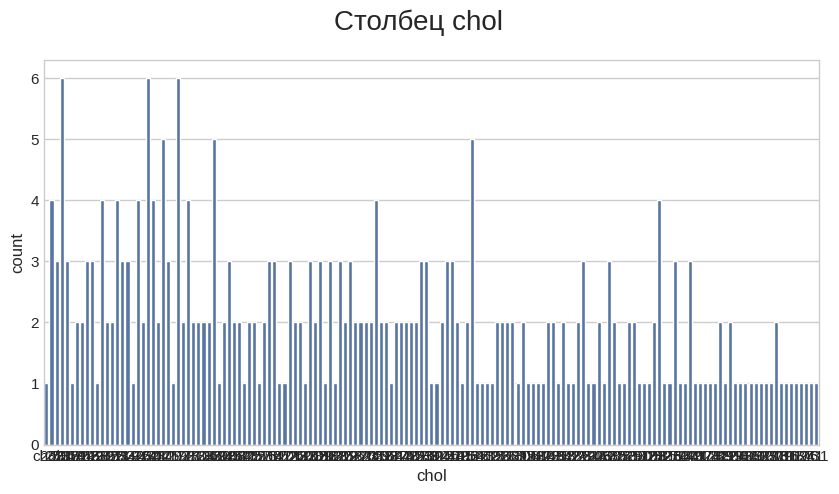

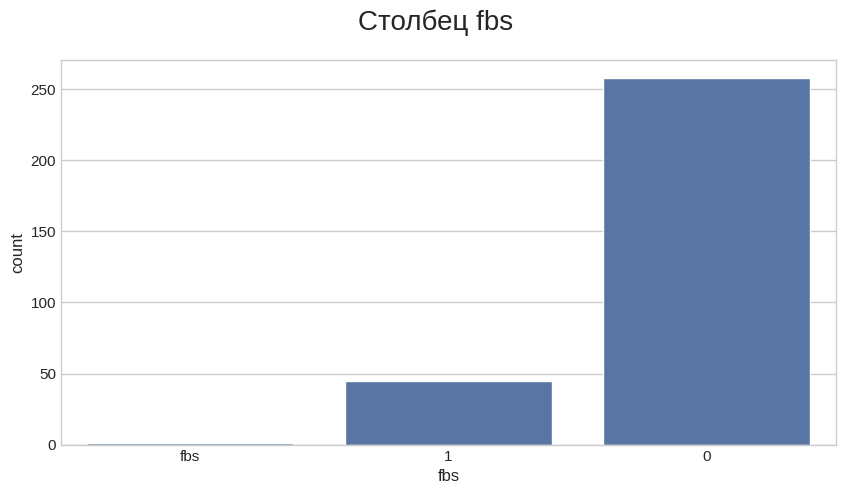

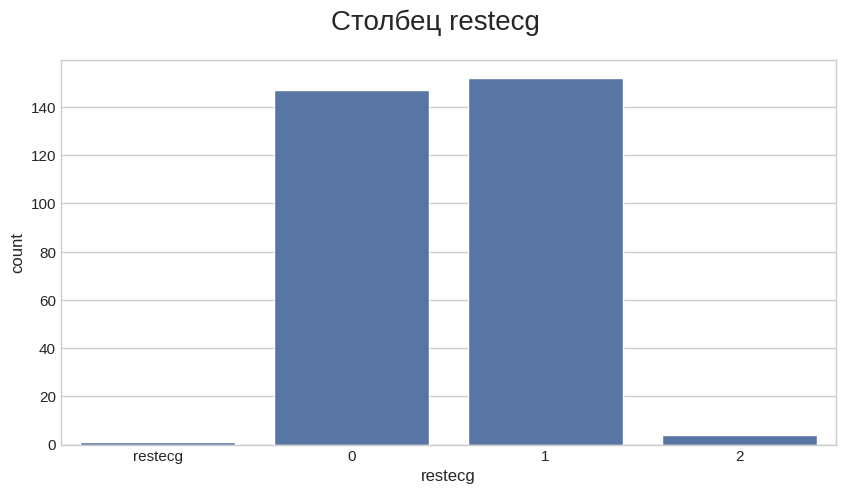

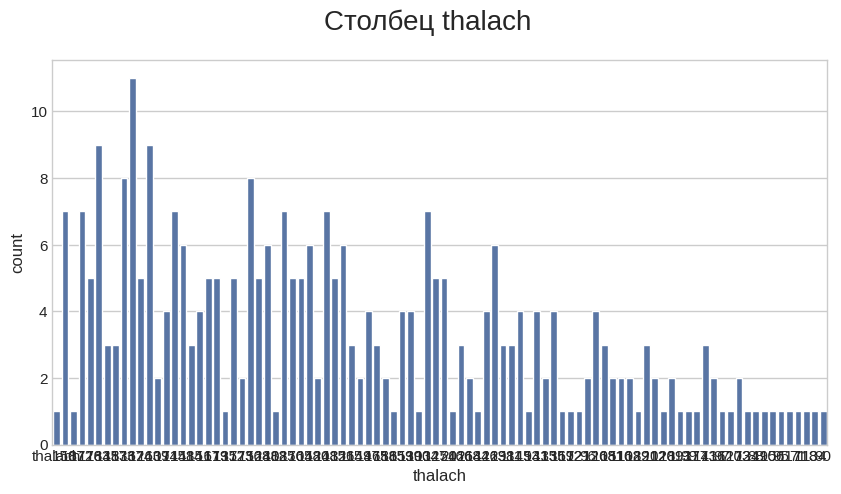

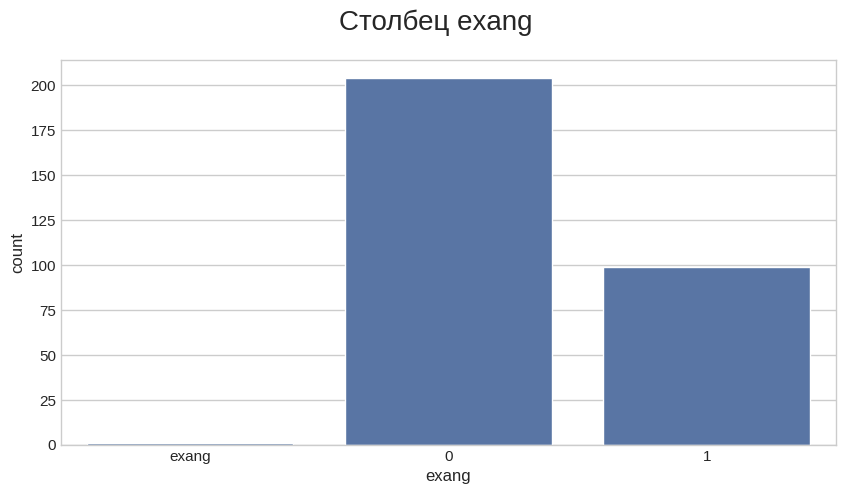

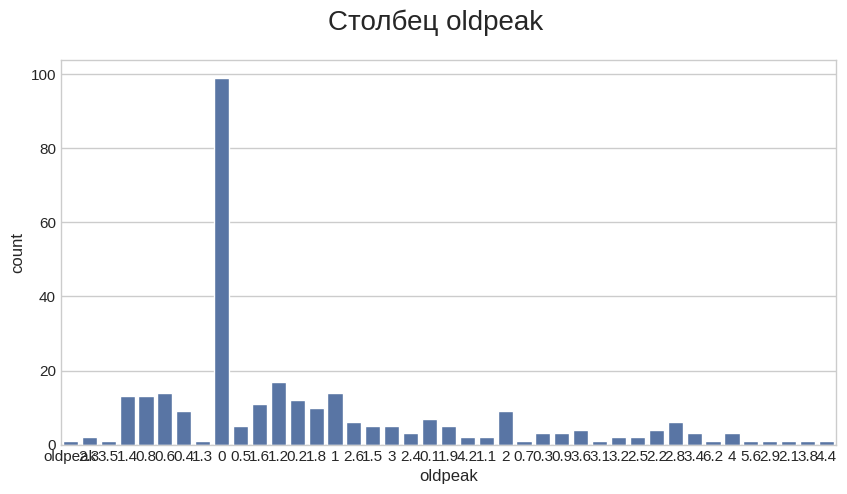

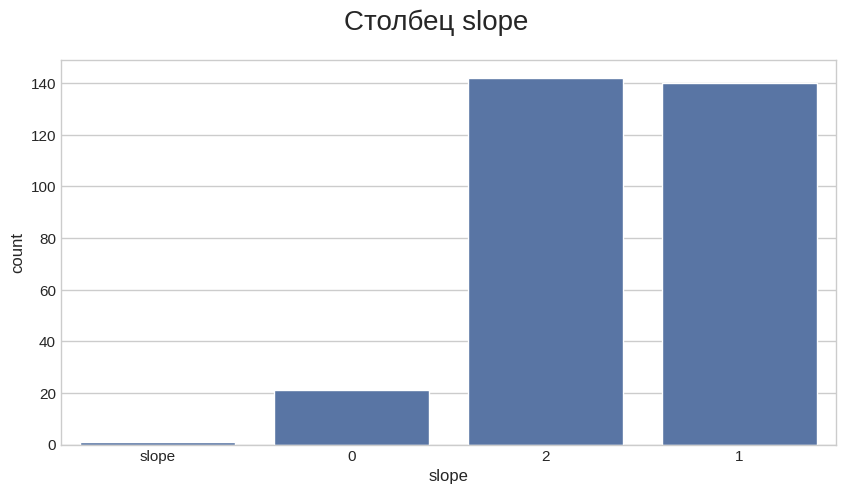

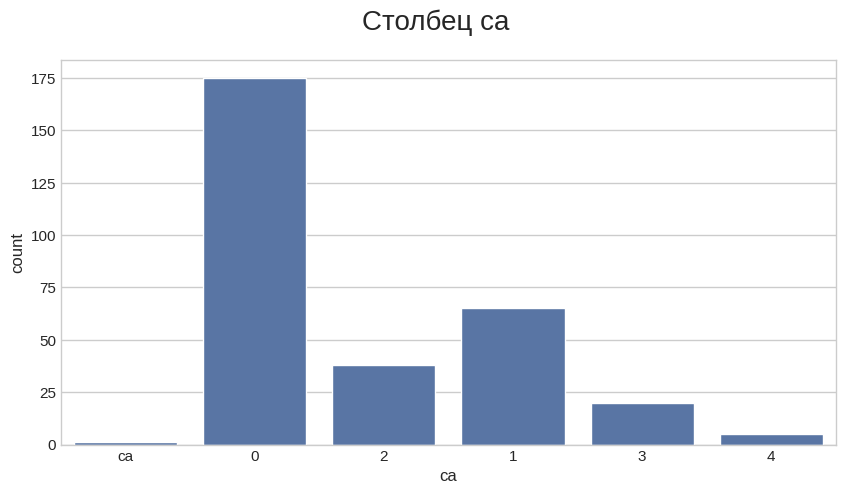

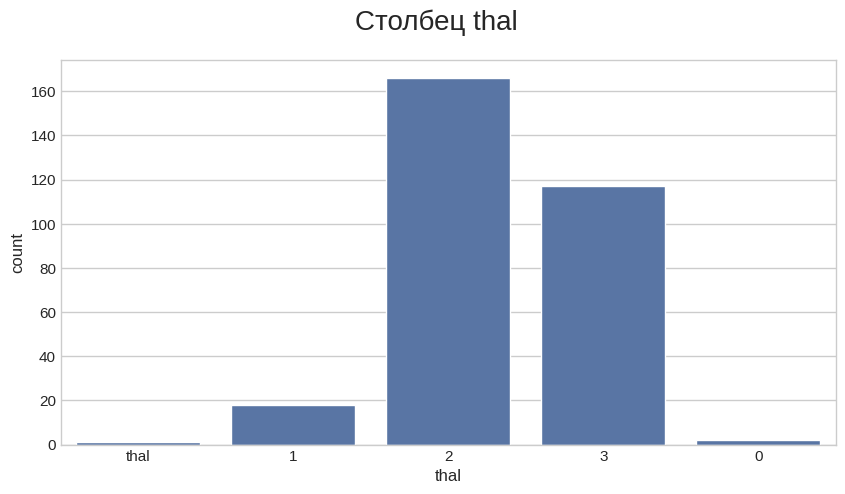

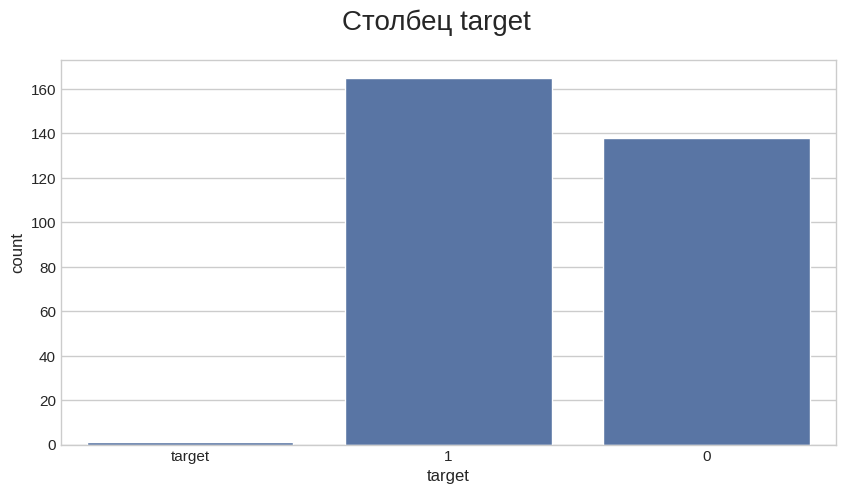

In [35]:
for column in columns:
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle(f'Столбец {column}', fontsize=20)
    sns.countplot(x=column, data=df)
    plt.show()


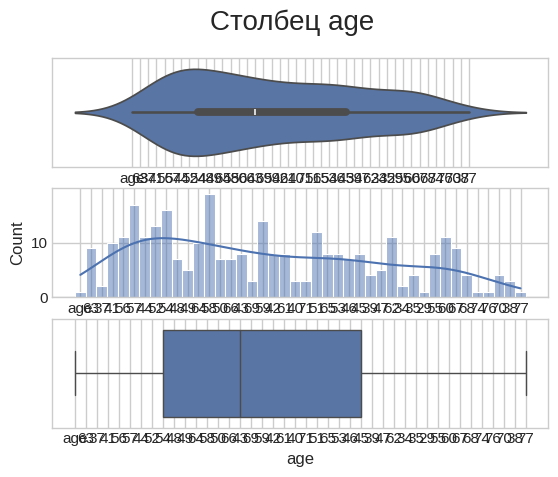

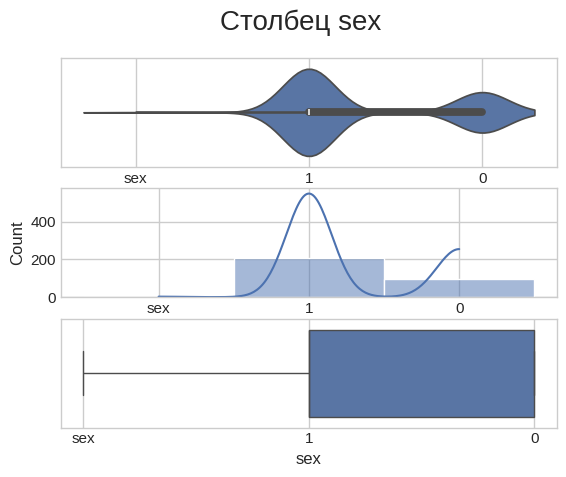

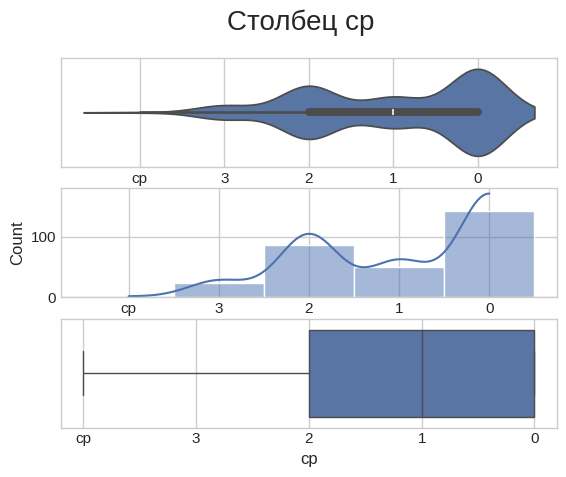

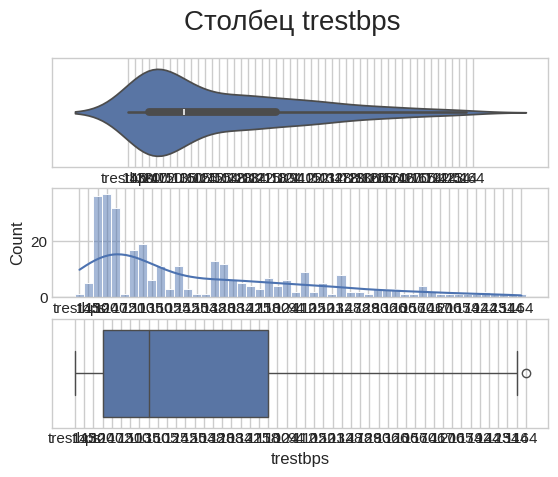

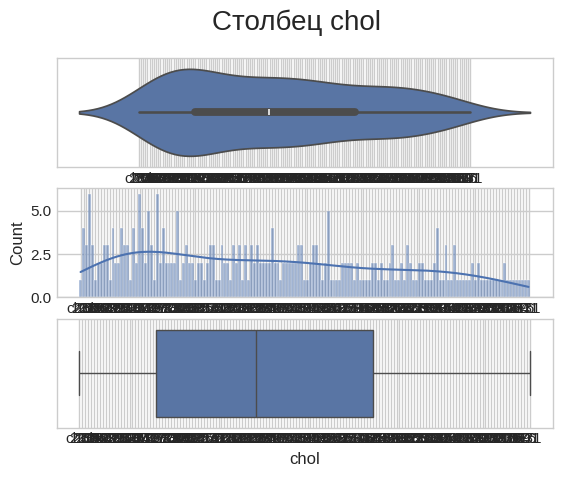

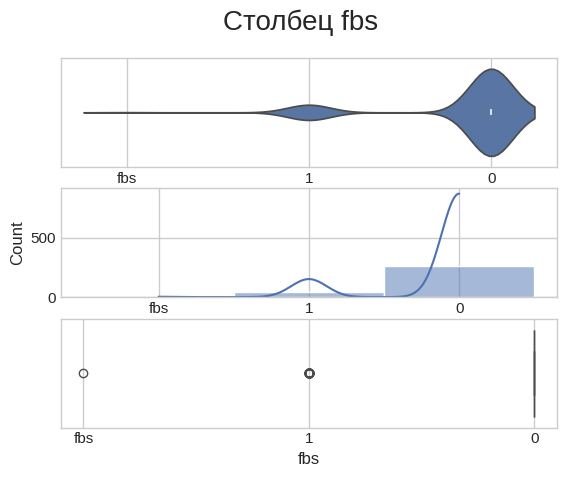

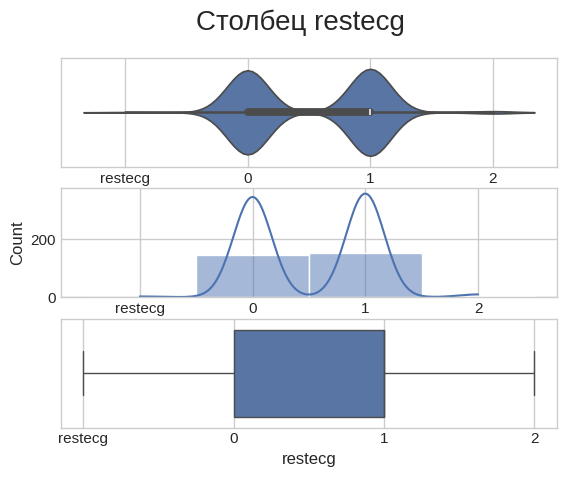

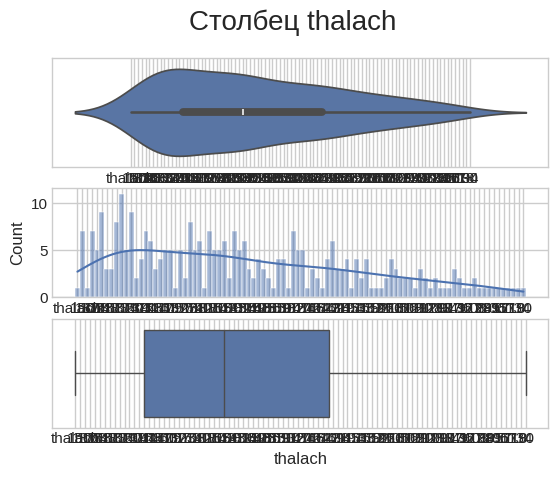

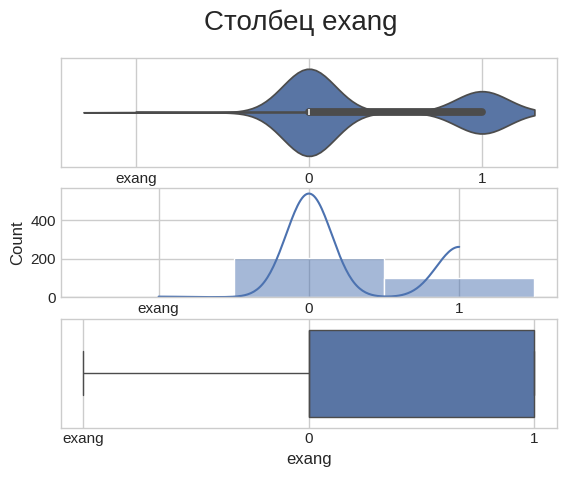

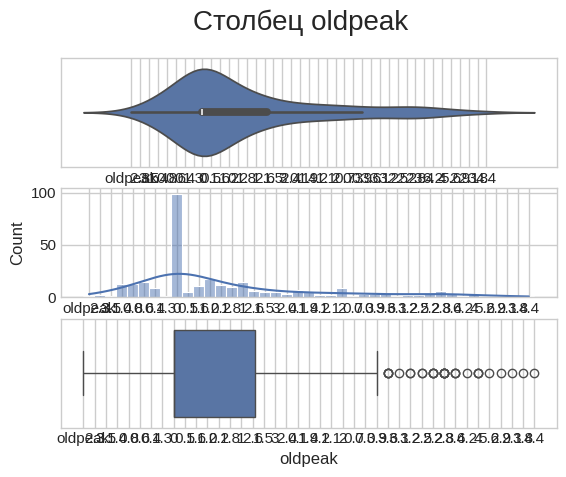

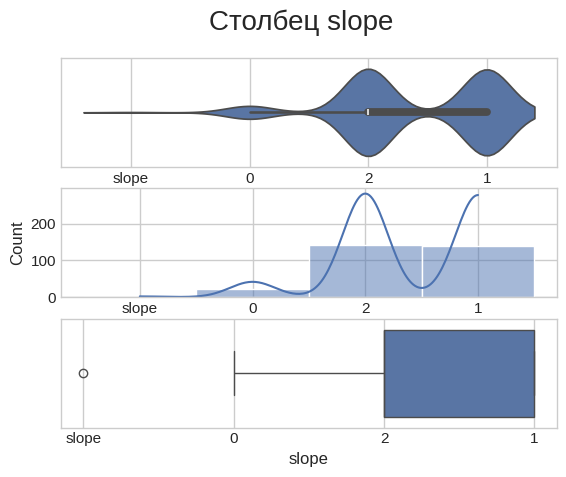

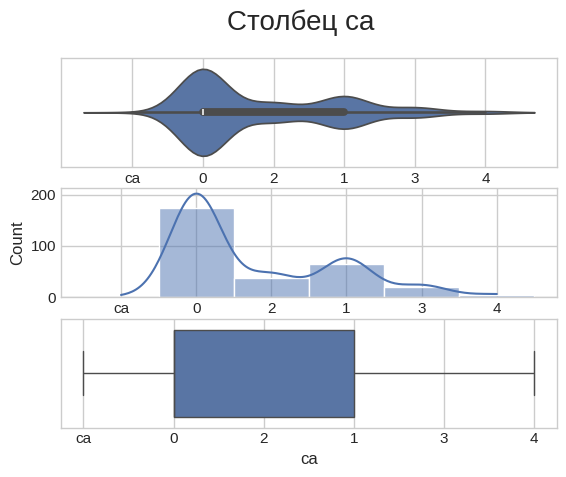

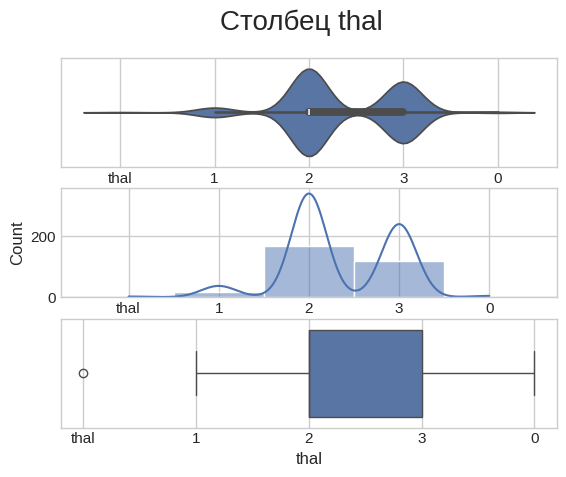

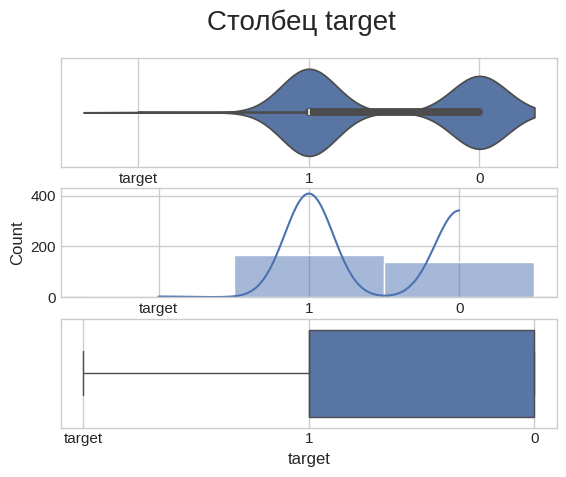

In [36]:
for column in columns:
    fig, ax = plt.subplots(3, 1)  # figsize=(10,5))
    fig.suptitle(f'Столбец {column}', fontsize=20)
    sns.violinplot(ax=ax[0], x=df[column])
    sns.histplot(x=df[column], kde=True, ax=ax[1])
    sns.boxplot(x=df[column])
    plt.show()


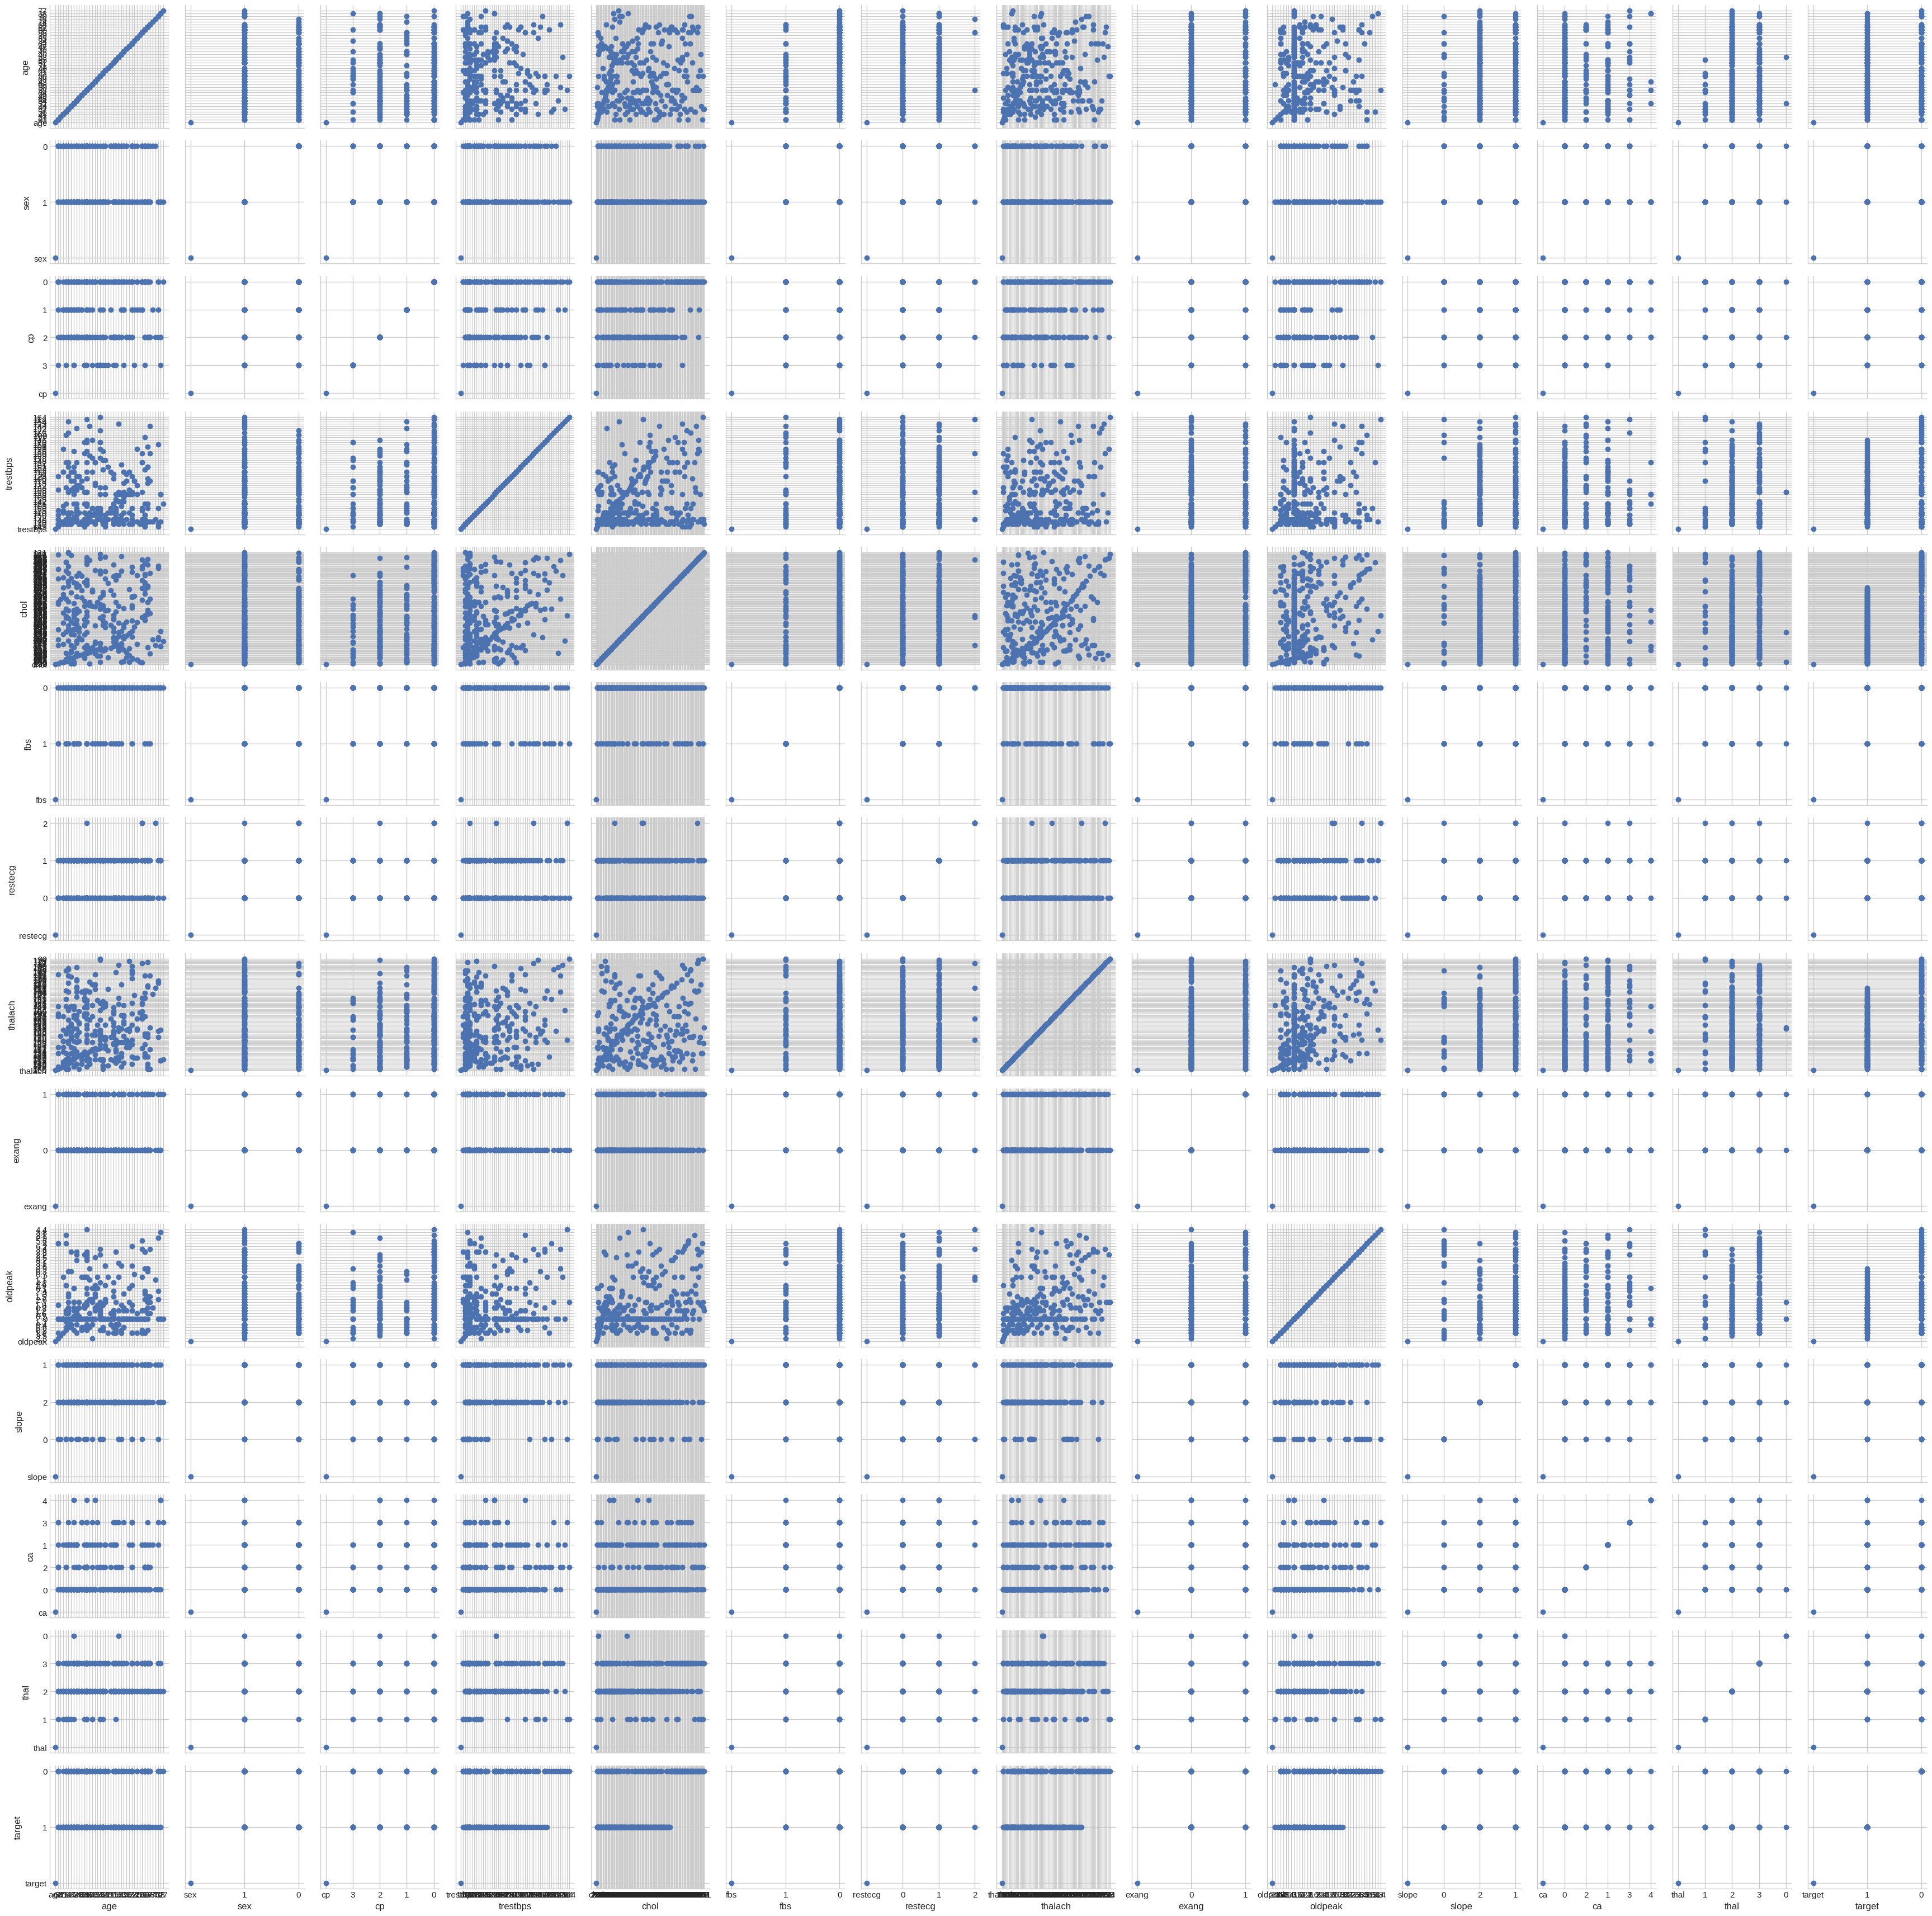

In [37]:
# Диаграмма рассеивания
pair_grid_plot = sns.PairGrid(df, vars=columns)
pair_grid_plot.map(plt.scatter)

In [42]:
# корреляция
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


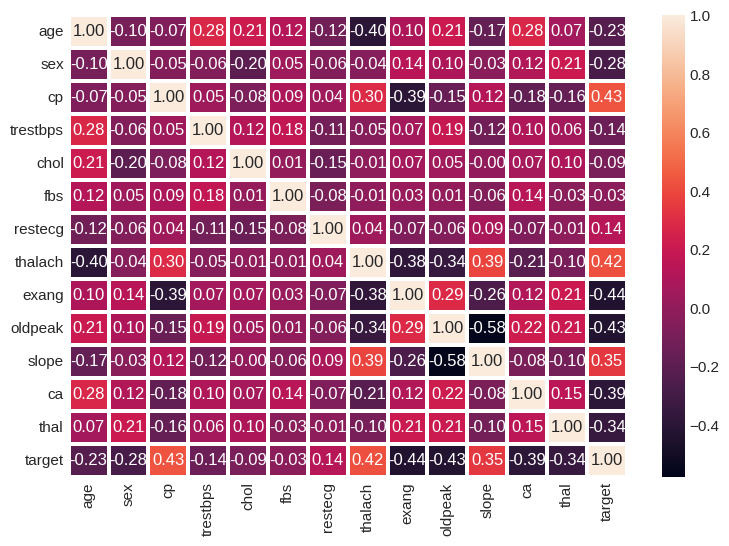

In [43]:
# Корреляция
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

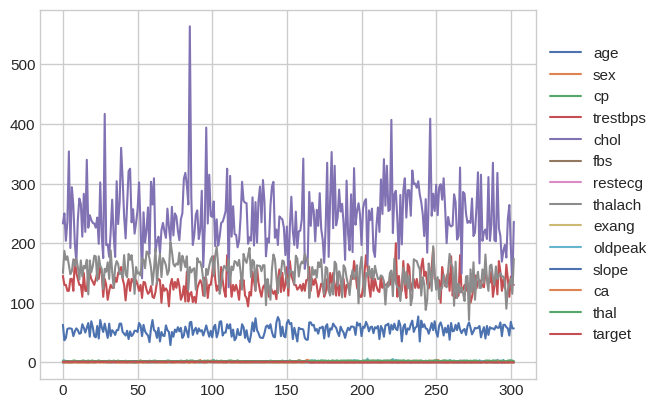

In [44]:
# Profile plot
ax = df[columns].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Пропуски

In [45]:
# пропущенные значения NaN
print(df.isnull().any())
print(df.isna().any())

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


In [46]:
print(df.isnull().sum())
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


пропусков нет !

# Поиск выбросов или аномалий

In [48]:
# Статистический метод (метод межквартильного размаха) - функция для поиска outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [49]:
df_outliers = find_outliers_IQR(df)
df_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# статистика outliers
stat_outliers = pd.DataFrame({'number': df_outliers.notnull().sum(),
    'min': df.min(),
    'max': df.max(),
    'mean': df.mean(),
    'median':df.median()})
stat_outliers

,number,min,max,mean,median
age,0,29.0,77.0,54.366337,55.0
sex,0,0.0,1.0,0.683168,1.0
cp,0,0.0,3.0,0.966997,1.0
trestbps,9,94.0,200.0,131.623762,130.0
chol,5,126.0,564.0,246.264026,240.0
fbs,45,0.0,1.0,0.148515,0.0
restecg,0,0.0,2.0,0.528053,1.0
thalach,1,71.0,202.0,149.646865,153.0
exang,0,0.0,1.0,0.326733,0.0
oldpeak,5,0.0,6.2,1.039604,0.8


# Судя по HeatMap больше всего на результат влияют колонки cp, thalach, slope, будем опиратся на них в нашей модели

In [64]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df.filter(items=['cp','thalach','slope', 'target']), test_size=0.1, random_state=0)

In [66]:
X_train = train.filter(items = ['cp','thalach','slope'])
y_train = train['target']

X_test = test.filter(items = ['cp','thalach','slope'])
y_test = test['target']

In [67]:
X_train

,cp,thalach,slope
225,0,125,0
152,3,155,1
228,3,159,1
201,0,141,1
52,2,146,1
245,0,166,1
175,0,114,1
168,0,147,1
223,0,133,0
217,0,132,2


In [68]:
y_train

225    0
152    1
228    0
201    0
52     1
245    0
175    0
168    0
223    0
217    0
111    1
135    1
218    0
12     1
15     1
66     1
97     1
90     1
198    0
103    1
22     1
212    0
226    0
264    0
133    1
216    0
275    0
270    0
154    1
55     1
194    0
Name: target, dtype: int64

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(random_state=0)

lr_model = lr_model.fit(X_train, y_train)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "penalty": ['l1', 'l2', 'elasticnet', None],
}
lr_model = LogisticRegression(random_state=0)
lr_wrapped = GridSearchCV(
    lr_model,
    params,
    cv=3
)

lr_wrapped.fit(X_train, y_train)
print(lr_wrapped.best_params_)

{'penalty': 'l2', 'solver': 'lbfgs'}


In [77]:
lr_model = LogisticRegression(**lr_wrapped.best_params_)
lr_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('accuracy: ', accuracy_score(lr_model.predict(X_test), y_test))

accuracy:  0.7169117647058824


In [78]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    "algorithm": ['auto' 'ball_tree', 'kd_tree', 'brute'],  # алгоритм, используемый для вычисления ближайших соседей.
    "weights": ['uniform', 'distance'],  # весовая функция, используемая в прогнозировании.
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15],  # количество соседей
    "p": [1, 2, 3],  # параметр мощности для метрики Минковского. При p = 2 - евклидова метрика
}

knn_model = KNeighborsClassifier()
knn_wrapped = GridSearchCV(
    knn_model,
    params,
    cv=3
)

knn_wrapped.fit(X_train, y_train)
print(knn_wrapped.best_params_)

{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [79]:
knn_model = KNeighborsClassifier(**knn_wrapped.best_params_)
knn_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('accuracy: ', accuracy_score(knn_model.predict(X_test), y_test))

accuracy:  0.6838235294117647


In [80]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_features": [int, float, "sqrt", "log2"]
}

dt_model = DecisionTreeClassifier(criterion="entropy")
dt_wrapped = GridSearchCV(
    dt_model,
    params,
    cv=3
)

dt_wrapped.fit(X_train, y_train)
print(dt_wrapped.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'}


In [81]:
dt_model = DecisionTreeClassifier(**dt_wrapped.best_params_)
dt_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('accuracy: ', accuracy_score(dt_model.predict(X_test), y_test))

accuracy:  0.7058823529411765
